<a href="https://colab.research.google.com/github/rborgesr/analise-covid-brasil/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_requests_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usando a Biblioteca `requests` em Python para Ciência de Dados

## Objetivos
- Introduzir a biblioteca `requests` para realizar requisições HTTP.
- Demonstrar como usar APIs públicas para coletar dados.
- Analisar e visualizar os dados usando `pandas` e `matplotlib`.
- Trabalhar com um exemplo de dados de uma API relacionada à saúde pública.

## 1. O que é a Biblioteca `requests`?
**Requests** é uma biblioteca simples e poderosa para realizar requisições HTTP em Python, facilitando a coleta de dados a partir de APIs públicas.

- **Instalação**: `!pip install requests`
- **Importação**: `import requests`

## 2. Fazendo uma Requisição Simples

In [ ]:

import requests

# Fazendo uma requisição para a API pública
url = 'https://disease.sh/v3/covid-19/countries/Brazil'
response = requests.get(url)

# Verificando o status da requisição
if response.status_code == 200:
    print("Requisição bem-sucedida!")
else:
    print("Erro na requisição:", response.status_code)

# Visualizando os dados recebidos
data = response.json()
print(data)


Requisição bem-sucedida!
{'updated': 1727473341063, 'country': 'Brazil', 'countryInfo': {'_id': 76, 'iso2': 'BR', 'iso3': 'BRA', 'lat': -10, 'long': -55, 'flag': 'https://disease.sh/assets/img/flags/br.png'}, 'cases': 38743918, 'todayCases': 0, 'deaths': 711380, 'todayDeaths': 0, 'recovered': 36249161, 'todayRecovered': 0, 'active': 1783377, 'critical': 0, 'casesPerOneMillion': 179908, 'deathsPerOneMillion': 3303, 'tests': 63776166, 'testsPerOneMillion': 296146, 'population': 215353593, 'continent': 'South America', 'oneCasePerPeople': 6, 'oneDeathPerPeople': 303, 'oneTestPerPeople': 3, 'activePerOneMillion': 8281.16, 'recoveredPerOneMillion': 168323.92, 'criticalPerOneMillion': 0}


## 3. Trabalhando com Dados da API

In [ ]:

import pandas as pd

# Extraindo dados relevantes
data = {
    'país': ['Brazil'],
    'casos': [response.json()['cases']],
    'mortes': [response.json()['deaths']],
    'recuperados': [response.json()['recovered']],
    'testes': [response.json()['tests']],
    'população': [response.json()['population']]
}

# Criando um DataFrame
df = pd.DataFrame(data)
print(df)


     país     casos  mortes  recuperados    testes  população
0  Brazil  38743918  711380     36249161  63776166  215353593


## 4. Visualizando os Dados

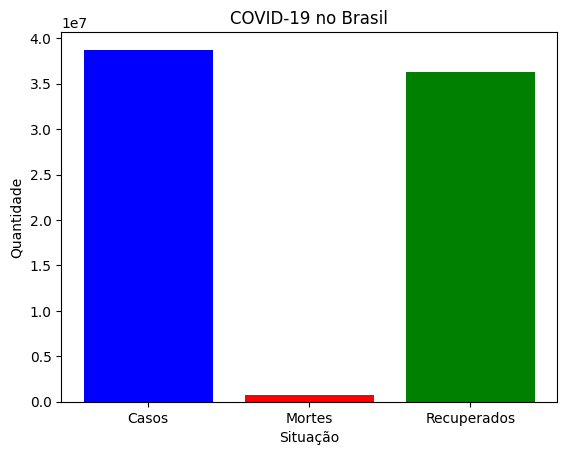

In [ ]:

import matplotlib.pyplot as plt

# Dados para o gráfico
labels = ['Casos', 'Mortes', 'Recuperados']
valores = [df['casos'][0], df['mortes'][0], df['recuperados'][0]]

# Criando gráfico de barras
plt.bar(labels, valores, color=['blue', 'red', 'green'])

# Adicionando título e rótulos
plt.title('COVID-19 no Brasil')
plt.xlabel('Situação')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()


## 5. Requisições Mais Complexas: Usando Parâmetros

In [ ]:

# Fazendo uma requisição com parâmetros (dados históricos dos últimos 30 dias)
url_historico = 'https://disease.sh/v3/covid-19/historical/Brazil?lastdays=30'
response_historico = requests.get(url_historico)

# Convertendo para JSON e visualizando os dados históricos
historical_data = response_historico.json()
print(historical_data['timeline']['cases'])  # Exibindo os casos ao longo do tempo


{'2/8/23': 36897683, '2/9/23': 36905201, '2/10/23': 36917623, '2/11/23': 36930339, '2/12/23': 36932830, '2/13/23': 36953492, '2/14/23': 36953492, '2/15/23': 36971440, '2/16/23': 36970513, '2/17/23': 36970513, '2/18/23': 36987682, '2/19/23': 36987682, '2/20/23': 36987682, '2/21/23': 36987682, '2/22/23': 36997328, '2/23/23': 37008944, '2/24/23': 37020531, '2/25/23': 37020531, '2/26/23': 37020531, '2/27/23': 37038230, '2/28/23': 37052936, '3/1/23': 37063464, '3/2/23': 37063464, '3/3/23': 37081209, '3/4/23': 37081209, '3/5/23': 37081209, '3/6/23': 37076053, '3/7/23': 37076053, '3/8/23': 37076053, '3/9/23': 37076053}


## 6. Analisando Dados Históricos

<ipython-input-5-60edda33e756>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_history['Data'] = pd.to_datetime(df_history['Data'])


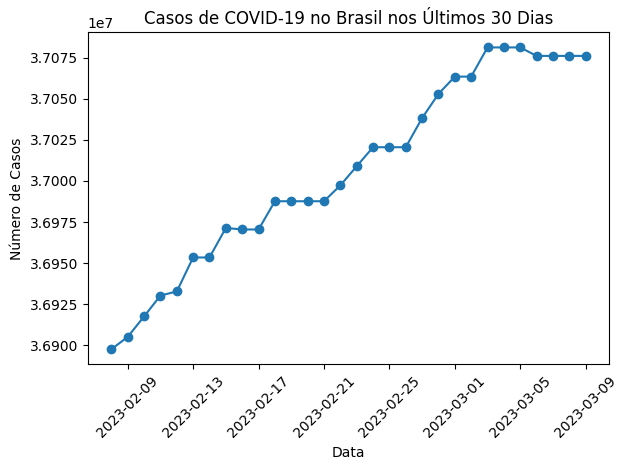

In [ ]:

# Extraindo dados históricos de casos
cases_history = historical_data['timeline']['cases']

# Organizando em DataFrame para visualização
df_history = pd.DataFrame(list(cases_history.items()), columns=['Data', 'Casos'])
df_history['Data'] = pd.to_datetime(df_history['Data'])

# Criando gráfico de linha para os casos históricos
plt.plot(df_history['Data'], df_history['Casos'], marker='o')

# Adicionando título e rótulos
plt.title('Casos de COVID-19 no Brasil nos Últimos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Número de Casos')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7. Respostas dos Exercícios Práticos

### Exercício 1: Comparando dados da COVID-19 entre Brasil e Estados Unidos

In [ ]:

# Requisição para o Brasil
url_brazil = 'https://disease.sh/v3/covid-19/countries/Brazil'
response_brazil = requests.get(url_brazil)
data_brazil = response_brazil.json()

# Requisição para os Estados Unidos
url_usa = 'https://disease.sh/v3/covid-19/countries/USA'
response_usa = requests.get(url_usa)
data_usa = response_usa.json()

# Organizando os dados em DataFrames
data_comparison = {
    'país': ['Brazil', 'USA'],
    'casos': [data_brazil['cases'], data_usa['cases']],
    'mortes': [data_brazil['deaths'], data_usa['deaths']],
    'recuperados': [data_brazil['recovered'], data_usa['recovered']],
    'testes': [data_brazil['tests'], data_usa['tests']],
    'população': [data_brazil['population'], data_usa['population']]
}

df_comparison = pd.DataFrame(data_comparison)
print(df_comparison)


     país      casos   mortes  recuperados      testes  população
0  Brazil   38743918   711380     36249161    63776166  215353593
1     USA  111820082  1219487    109814428  1186851502  334805269


### Exercício 2: Extraindo dados de mortes ao longo dos últimos 30 dias no Brasil

<ipython-input-7-7759f8ba5116>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_deaths_history['Data'] = pd.to_datetime(df_deaths_history['Data'])


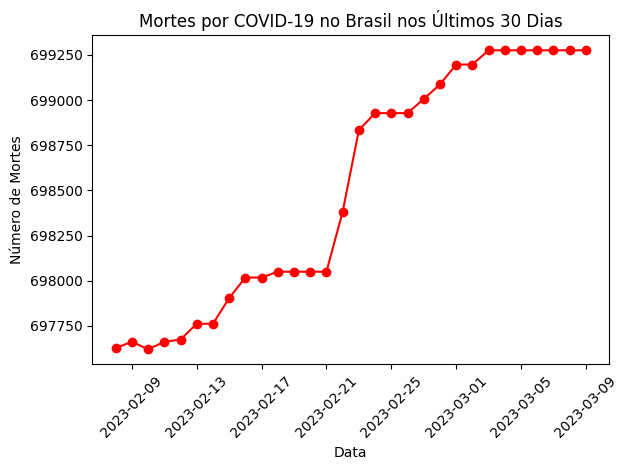

In [ ]:

# Extraindo dados de mortes históricas
deaths_history_brazil = historical_data['timeline']['deaths']

# Organizando em DataFrame
df_deaths_history = pd.DataFrame(list(deaths_history_brazil.items()), columns=['Data', 'Mortes'])
df_deaths_history['Data'] = pd.to_datetime(df_deaths_history['Data'])

# Criando gráfico de linha para os dados de mortes históricas no Brasil
plt.plot(df_deaths_history['Data'], df_deaths_history['Mortes'], marker='o', color='red')
plt.title('Mortes por COVID-19 no Brasil nos Últimos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Exercício 3: Exploração de outra API Pública

In [ ]:

# API escolhida: Simulação de dados globais de COVID-19
url_population = 'https://disease.sh/v3/covid-19/all'
response_population = requests.get(url_population)
data_population = response_population.json()

# Organizando dados simulados em DataFrame
data_global = {
    'população_mundial': [data_population['population']],
    'casos_mundiais': [data_population['cases']],
    'mortes_mundiais': [data_population['deaths']],
    'recuperados_mundiais': [data_population['recovered']],
}

df_global = pd.DataFrame(data_global)
print(df_global)


   população_mundial  casos_mundiais  mortes_mundiais  recuperados_mundiais
0         7944935131       704753890          7010681             675619811
